# New registrations of electric vehicles in Europe

In [2]:
import pandas as pd
ev_data = pd.read_csv('new-electric-vehicles-in-eu-3.csv')
print(ev_data.head())

   Year:text  Battery electric cars:number  Plug-in electric cars:number  \
0       2010                           591                           NaN   
1       2011                          7179                           NaN   
2       2012                         13730                        6225.0   
3       2013                         21454                       31079.0   
4       2014                         31197                       60370.0   

   Total cars:number  Share of electric cars:number  
0           11128785                            0.0  
1           10498868                            0.1  
2            9369664                            0.2  
3            9573937                            0.5  
4           10075476                            0.9  


In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year:text                      13 non-null     int64  
 1   Battery electric cars:number   13 non-null     int64  
 2   Plug-in electric cars:number   11 non-null     float64
 3   Total cars:number              13 non-null     int64  
 4   Share of electric cars:number  13 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 648.0 bytes


In [4]:
ev_data.isnull().sum()

Year:text                        0
Battery electric cars:number     0
Plug-in electric cars:number     2
Total cars:number                0
Share of electric cars:number    0
dtype: int64

In [5]:
ev_data = ev_data.dropna()

Index(['Year:text', 'Battery electric cars:number',
       'Plug-in electric cars:number', 'Total cars:number',
       'Share of electric cars:number'],
      dtype='object')


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

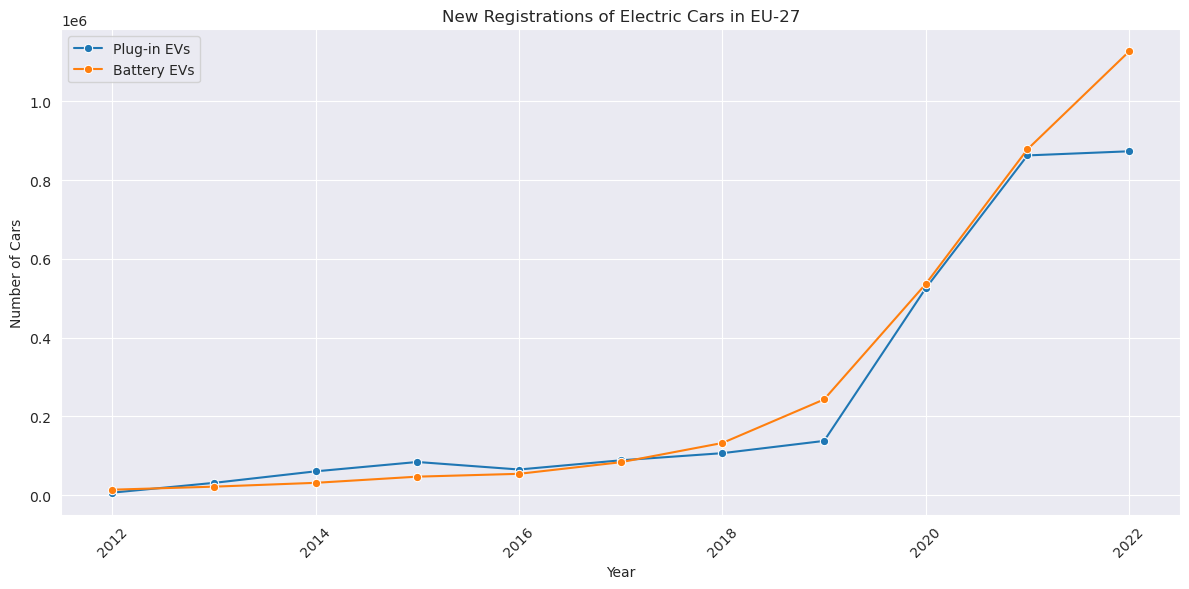

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style for the plots
sns.set_style('darkgrid')

# Check the column names in the DataFrame (use this for debugging)
print(ev_data.columns)

# Grouping the data by 'Year' and summing the values of 'Plug-in' and 'Battery'
ev_adoption_by_year = ev_data.groupby('Year:text').agg({
    'Plug-in electric cars:number': 'sum',
    'Battery electric cars:number': 'sum',
    'Total cars:number': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot Plug-in EVs and Battery EVs
sns.lineplot(x='Year:text', y='Plug-in electric cars:number', data=ev_adoption_by_year, label='Plug-in EVs', marker='o')
sns.lineplot(x='Year:text', y='Battery electric cars:number', data=ev_adoption_by_year, label='Battery EVs', marker='o')

# Add title and labels
plt.title('New Registrations of Electric Cars in EU-27')
plt.xlabel('Year')
plt.ylabel('Number of Cars')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Newly registered electric cars by country

In [10]:
ev_data_by_country = pd.read_csv('FIG2-257004-TERM034-v3_Data.csv')
print(ev_data_by_country.head())

  Row Labels  ELECTRIC  Plug-in Hybrid  BEV [%]  PHEV [%]
0         SE     97696           64719   0.3503    0.2320
1         IS      5546            3730   0.3358    0.2258
2         FI     14517           16155   0.1827    0.2034
3         MT       847            1150   0.1367    0.1856
4         DK     30418           23811   0.2117    0.1657


In [11]:
ev_data_by_country.info

<bound method DataFrame.info of    Row Labels  ELECTRIC  Plug-in Hybrid  BEV [%]  PHEV [%]
0          SE     97696           64719   0.3503    0.2320
1          IS      5546            3730   0.3358    0.2258
2          FI     14517           16155   0.1827    0.2034
3          MT       847            1150   0.1367    0.1856
4          DK     30418           23811   0.2117    0.1657
5          BE     37626           59290   0.1027    0.1618
6          DE    465341          358643   0.1825    0.1406
7          NL     71166           34251   0.2339    0.1126
8          PT     17957           16086   0.1155    0.1035
9          LU      6377            3566   0.1657    0.0927
10         NO    137744           16046   0.7939    0.0925
11         IE     15725            8805   0.1491    0.0835
12         FR    210367          128659   0.1284    0.0785
13         CH     40507           17812   0.1766    0.0776
14         AT     34141           13247   0.1594    0.0618
15         ES     31785 

In [12]:
ev_data_by_country.isnull().sum()

Row Labels        0
ELECTRIC          0
Plug-in Hybrid    0
BEV [%]           0
PHEV [%]          0
dtype: int64

In [13]:
# Set the country as index 
ev_data_by_country.set_index('Row Labels', inplace=True)

# Create a mapping of abbreviations to full names
country_mapping = {
    'SE': 'Sweden', 'IS': 'Iceland', 'FI': 'Finland', 'MT': 'Malta', 'DK': 'Denmark',
    'BE': 'Belgium', 'DE': 'Germany', 'NL': 'Netherlands', 'PT': 'Portugal', 'LU': 'Luxembourg',
    'NO': 'Norway', 'IE': 'Ireland', 'FR': 'France', 'CH': 'Switzerland', 'AT': 'Austria',
    'ES': 'Spain', 'GR': 'Greece', 'IT': 'Italy', 'HU': 'Hungary', 'RO': 'Romania',
    'BG': 'Bulgaria', 'LT': 'Lithuania', 'HR': 'Croatia', 'CZ': 'Czech Republic',
    'PL': 'Poland', 'LV': 'Latvia', 'EE': 'Estonia', 'CY': 'Cyprus', 'SI': 'Slovenia',
    'SK': 'Slovakia'
}

In [ ]:
# New EV registrations by country per number of passenger cars registered
import numpy as np
sns.set_style('white')
colors = ['green', 'grey'] 
ax=ev_data_by_country.plot(kind='barh', stacked=True, color=colors)
plt.grid(axis="x")
plt.title('New EV Registrations by Country')
plt.xlabel('Number of passenger car registered')
plt.ylabel('')
ax.set_xlim([0, 900000])
ax.set_xticks(range(0,150000))
ax.set_yticks(range(len(country_mapping)))
ax.set_yticklabels([country_mapping[code] for code in ev_data_by_country.index])
plt.legend(['Electric - BEV', 'Plug-in Hybrid - PHEV'], title='Vehicle Type')
plt.box(False)
plt.tight_layout()
plt.show()


In [ ]:
# Convert percentages to whole numbers
ev_data_by_country['BEV [%]'] = ev_data_by_country['BEV [%]'] * 100
ev_data_by_country['PHEV [%]'] = ev_data_by_country['PHEV [%]'] * 100

# New EV registrations by country per percentage of passenger cars registered
sns.set_style('white')
colors = ['green', 'grey']
ax = ev_data_by_country[['BEV [%]', 'PHEV [%]']].plot(kind='barh', stacked=True, color=colors)
plt.grid(axis="x")
plt.title('New EV Registrations by Country (Percentage)')
plt.xlabel('Percentage of passenger car registered')
plt.ylabel('')
ax.set_yticks(range(len(country_mapping)))
ax.set_yticklabels([country_mapping[code] for code in ev_data_by_country.index])
plt.legend(['Electric - BEV', 'Plug-in Hybrid - PHEV'], title='Vehicle Type')
plt.box(False)
plt.tight_layout()
plt.show()
